In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import tensorflow as tf

In [ ]:
data=pd.read_csv("/content/diabetes.csv")

In [ ]:
## Data preprocessing

data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
data["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = data.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(data.values, i)
                          for i in range(len(data.columns))]
  
print(vif_data)

                    feature        VIF
0               Pregnancies   3.364416
1                   Glucose  18.030209
2             BloodPressure  15.313159
3             SkinThickness   4.008709
4                   Insulin   2.063940
5                       BMI  18.515112
6  DiabetesPedigreeFunction   3.213450
7                       Age  13.500531
8                   Outcome   1.948398


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4aee791b50>,
      dtype=object)

<Figure size 2160x1080 with 0 Axes>

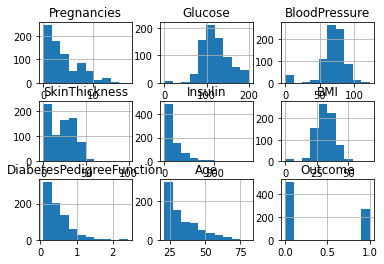

In [ ]:
fig = plt.figure(figsize =(30, 15))
data.hist()

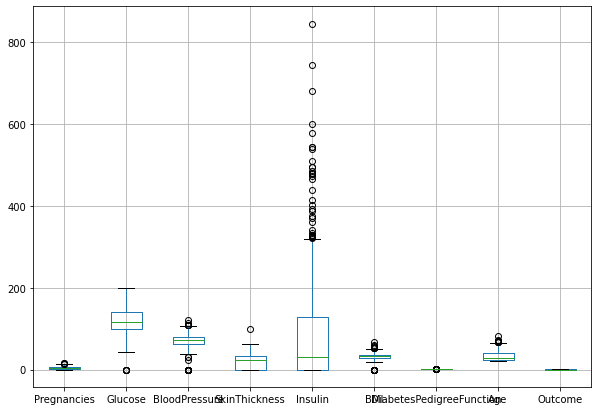

In [ ]:
fig = plt.figure(figsize =(10, 7))
data.boxplot()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from matplotlib import pyplot

# load the dataset
def load_dataset(filename):
	# load the dataset as a pandas DataFrame
	data =pd. read_csv(filename, header=None)
	# retrieve numpy array
	dataset = data.values
	# split into input (X) and output (y) variables
	X = dataset[:, :-1]
	y = dataset[:,-1]
	return X, y

# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=f_classif, k='all')
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

# load the dataset
X, y = load_dataset('/content/diabetes.csv')
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))

Feature 0: 21.952926
Feature 1: 134.995132
Feature 2: 1.868609
Feature 3: 2.141532
Feature 4: 6.303769
Feature 5: 41.691993
Feature 6: 11.759834
Feature 7: 26.831139


In [ ]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
# from sklearn.datasets import load_boston
# import pandas as pd

# # IQR
# Q1 = np.percentile(data['Insulin'], 25,interpolation = 'midpoint')
 
# Q3 = np.percentile(data['Insulin'], 75,interpolation = 'midpoint')
# IQR = Q3 - Q1
 
# IQR = Q3 - Q1
 
# print("Old Shape: ", data.shape)
 
# # Upper bound
# upper = np.where(data['Insulin'] >= (Q3+1.5*IQR))
# # Lower bound
# lower = np.where(data['Insulin'] <= (Q1-1.5*IQR))
# data.drop(upper[0], inplace = True)
# data.drop(lower[0], inplace = True)

In [ ]:
# data=data[best_col]
# data.shape

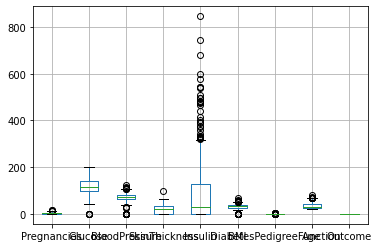

In [ ]:
data.boxplot()

In [ ]:
targt=data["Outcome"]
feture_data=data.drop(["Outcome","Insulin"],axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(feture_data,targt,test_size=0.33)

In [ ]:
x_train.shape

(514, 7)

In [ ]:
from tensorflow.keras import Sequential,layers

In [ ]:
model=Sequential()
model.add(layers.Dense(32,input_dim=(7),activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.3))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.3))
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics='accuracy')

In [ ]:
model.fit(x_train,y_train,batch_size=10,epochs=200)

Epoch 1/200
52/52 [==============================] - 2s 3ms/step - loss: 0.8617 - accuracy: 0.5545
Epoch 2/200
52/52 [==============================] - 0s 3ms/step - loss: 0.7124 - accuracy: 0.6284
Epoch 3/200
52/52 [==============================] - 0s 3ms/step - loss: 0.6361 - accuracy: 0.6868
Epoch 4/200
52/52 [==============================] - 0s 3ms/step - loss: 0.6530 - accuracy: 0.7004
Epoch 5/200
52/52 [==============================] - 0s 3ms/step - loss: 0.6322 - accuracy: 0.6654
Epoch 6/200
52/52 [==============================] - 0s 3ms/step - loss: 0.5921 - accuracy: 0.7140
Epoch 7/200
52/52 [==============================] - 0s 3ms/step - loss: 0.6410 - accuracy: 0.6946
Epoch 8/200
52/52 [==============================] - 0s 3ms/step - loss: 0.5916 - accuracy: 0.6887
Epoch 9/200
52/52 [==============================] - 0s 3ms/step - loss: 0.5955 - accuracy: 0.7043
Epoch 10/200
52/52 [==============================] - 0s 3ms/step - loss: 0.5849 - accuracy: 0.6868
Epoch 11/

In [ ]:
pred=model.predict(x_test,batch_size=10)
rounded = [round(x[0]) for x in pred]
model.evaluate(x_test,y_test)

8/8 [==============================] - 0s 3ms/step - loss: 0.4621 - accuracy: 0.7795


[0.46212753653526306, 0.7795275449752808]

In [ ]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix


In [ ]:
print(classification_report(y_test,rounded))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       167
           1       0.72      0.57      0.64        87

    accuracy                           0.78       254
   macro avg       0.76      0.73      0.74       254
weighted avg       0.77      0.78      0.77       254

